### General Electric Stock Price

In [216]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.6 s (started: 2023-08-23 19:34:43 +01:00)


In [218]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import warnings
import joblib # to extract data


# Preprocessing of the data
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.datasets import make_classification
warnings.filterwarnings('ignore')

time: 0 ns (started: 2023-08-23 19:35:04 +01:00)


In [219]:
# operating system
import os
os.getcwd()

'C:\\Users\\Transsnet'

time: 0 ns (started: 2023-08-23 19:35:04 +01:00)


In [220]:
# import pandas lib as pd
import pandas as pd

from matplotlib import dates

dates.MonthLocator


matplotlib.dates.MonthLocator

time: 0 ns (started: 2023-08-23 19:35:04 +01:00)


In [221]:
import pandas as pd

# Read the Excel file
df = pd.read_csv('GE_Stock__Price__Data.csv')
df


,Time_of_trade(hh:mm:ss),Trade_Time(Secs),Waiting_Time(Secs),Trading_Price(US$),Log,Returns(US$),Stock_Movement
0,93027,34227,8,117.8750,0.000000,0.0000,Flat
1,93035,34235,11,117.8750,0.000530,0.0625,Gain
2,93046,34246,3,117.9375,0.000000,0.0000,Flat
3,93049,34249,5,117.9375,-0.000530,-0.0625,Loss
4,93054,34254,32,117.8750,0.000000,0.0000,Flat
...,...,...,...,...,...,...,...
55554,160033,57633,10,135.6250,-0.000922,-0.1250,Loss
55555,160043,57643,4,135.5000,0.000461,0.0625,Gain
55556,160047,57647,3,135.5625,0.000461,0.0625,Gain
55557,160050,57650,9,135.6250,-0.000461,-0.0625,Loss


time: 78 ms (started: 2023-08-23 19:35:04 +01:00)


In [222]:
df.head()

,Time_of_trade(hh:mm:ss),Trade_Time(Secs),Waiting_Time(Secs),Trading_Price(US$),Log,Returns(US$),Stock_Movement
0,93027,34227,8,117.8750,0.00000,0.0000,Flat
1,93035,34235,11,117.8750,0.00053,0.0625,Gain
2,93046,34246,3,117.9375,0.00000,0.0000,Flat
3,93049,34249,5,117.9375,-0.00053,-0.0625,Loss
4,93054,34254,32,117.8750,0.00000,0.0000,Flat


time: 15 ms (started: 2023-08-23 19:35:13 +01:00)


In [223]:
df.tail()

,Time_of_trade(hh:mm:ss),Trade_Time(Secs),Waiting_Time(Secs),Trading_Price(US$),Log,Returns(US$),Stock_Movement
55554,160033,57633,10,135.6250,-0.000922,-0.1250,Loss
55555,160043,57643,4,135.5000,0.000461,0.0625,Gain
55556,160047,57647,3,135.5625,0.000461,0.0625,Gain
55557,160050,57650,9,135.6250,-0.000461,-0.0625,Loss
55558,160059,57659,12,135.5625,0.000000,-135.5625,Loss


time: 16 ms (started: 2023-08-23 19:35:13 +01:00)


In [224]:
df.describe()

,Time_of_trade(hh:mm:ss),Trade_Time(Secs),Waiting_Time(Secs),Trading_Price(US$),Log,Returns(US$)
count,55559.000000,55559.000000,55559.000000,55559.000000,55559.000000,55559.000000
mean,124851.592991,45704.698339,8.852355,122.739774,0.000002,-0.002122
std,20617.028795,7429.289924,10.369622,4.891358,0.000401,0.577518
min,93011.000000,34211.000000,0.000000,114.625000,-0.010411,-135.562500
25%,104533.500000,38733.500000,3.000000,119.437500,0.000000,0.000000
50%,123358.000000,45238.000000,5.000000,121.875000,0.000000,0.000000
75%,144012.500000,52812.500000,11.000000,125.000000,0.000000,0.000000
max,160420.000000,57860.000000,195.000000,136.187500,0.011982,1.875000


time: 63 ms (started: 2023-08-23 19:35:14 +01:00)


In [225]:
print(f'The stock price movement are {df["""Stock_Movement"""].unique()}')


The stock price movement are ['Flat' 'Gain' 'Loss']
time: 0 ns (started: 2023-08-23 19:35:14 +01:00)


There are 7 unique stock price movement (target class)

### Data preprocessing
#### Data cleaning
#### Duplicates dropping


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55559 entries, 0 to 55558
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_of_trade(hh:mm:ss)  55559 non-null  int64  
 1   Trade_Time(Secs)         55559 non-null  int64  
 2   Waiting_Time(Secs)       55559 non-null  int64  
 3   Trading_Price(US$)       55559 non-null  float64
 4   Log                      55559 non-null  float64
 5   Returns(US$)             55559 non-null  float64
 6   Stock_Movement           55559 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 3.0+ MB
time: 32 ms (started: 2023-08-23 19:35:15 +01:00)


In [227]:
#Checking if there are null values in the dataset
df.isnull().sum()

Time_of_trade(hh:mm:ss)    0
Trade_Time(Secs)           0
Waiting_Time(Secs)         0
Trading_Price(US$)         0
Log                        0
Returns(US$)               0
Stock_Movement             0
dtype: int64

time: 32 ms (started: 2023-08-23 19:35:16 +01:00)


No missing values in the training dataset but we have to take into consideration if any missing data may appear in the test set.

### Dropping irrelavant features

In [228]:
df.drop(['Time_of_trade(hh:mm:ss)', 'Log'] , axis=1, inplace=True)     

time: 15 ms (started: 2023-08-23 19:35:17 +01:00)


In [229]:
df.drop(['Returns(US$)'] , axis=1, inplace=True) 

time: 16 ms (started: 2023-08-23 19:35:17 +01:00)


In [230]:
!pip install chart_studio

time: 10.4 s (started: 2023-08-23 19:35:17 +01:00)


In [231]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

time: 16 ms (started: 2023-08-23 19:35:28 +01:00)


In [232]:
!pip install pandas_datareader

time: 10.5 s (started: 2023-08-23 19:35:28 +01:00)


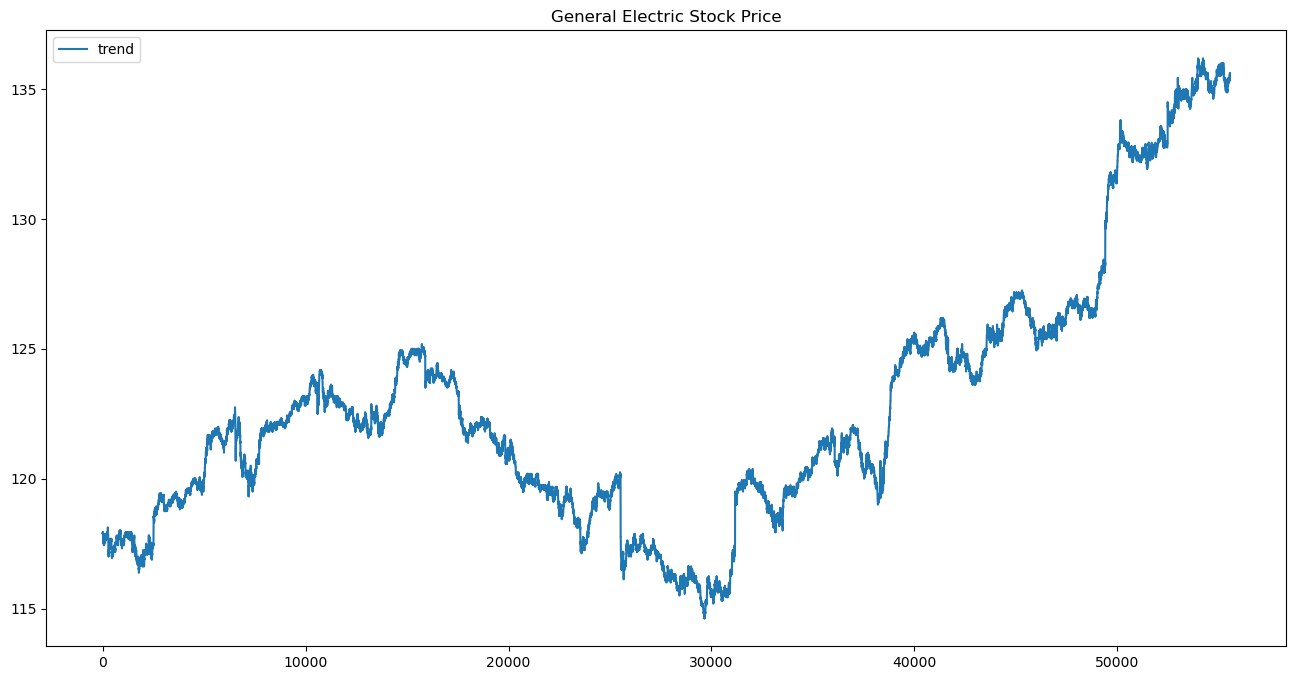

time: 547 ms (started: 2023-08-23 19:35:38 +01:00)


In [233]:
df['Trading_Price(US$)'].plot(label='trend', figsize=(16,8), title="General Electric Stock Price")
plt.legend();

### EDA
### 1- Count and distribution of all stock movement categories:

Flat    33006
Gain    11555
Loss    10998
Name: Stock_Movement, dtype: int64


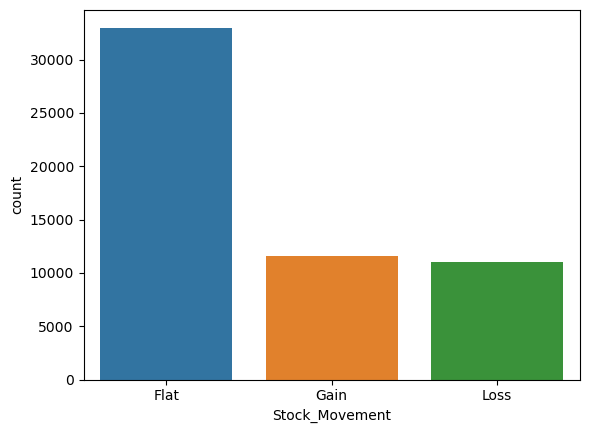

time: 188 ms (started: 2023-08-23 19:35:39 +01:00)


In [234]:
print(df['Stock_Movement'].value_counts())
_ = sns.countplot(x='Stock_Movement', data=df)

We can notice that there is an imbalance in the data we need to handle.

### 2- Distribution of numerical features:

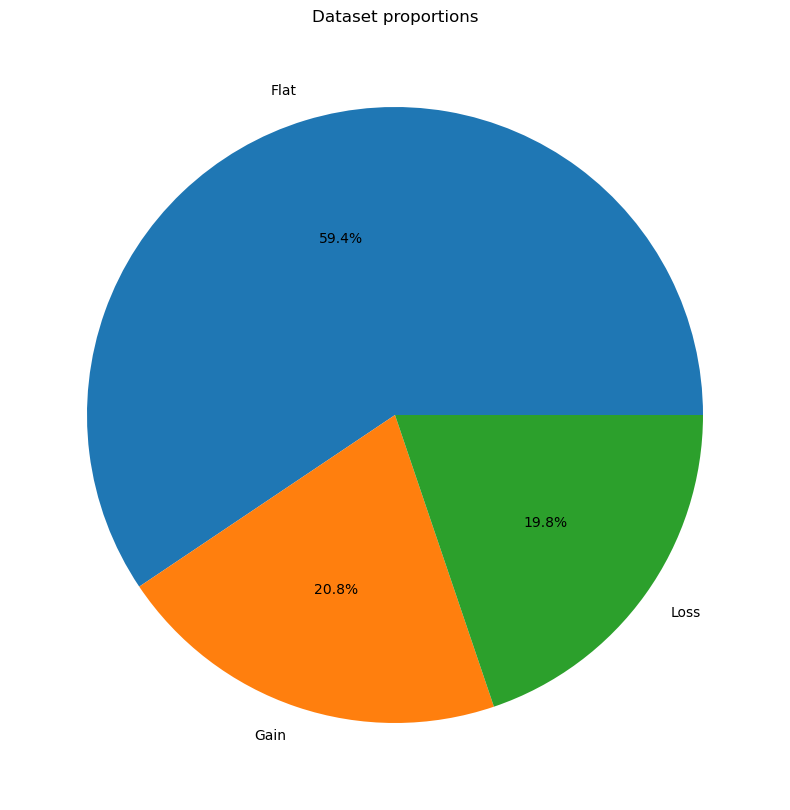

time: 250 ms (started: 2023-08-23 19:35:39 +01:00)


In [235]:
#Balancing the dataset: SMOTE
labels, counts = np.unique(df.Stock_Movement, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

### Let's Try Balancing Data (SMOTE)

In [236]:
X = df.drop('Stock_Movement', axis=1)
y = df.Stock_Movement

time: 0 ns (started: 2023-08-23 19:35:39 +01:00)


In [237]:
X

,Trade_Time(Secs),Waiting_Time(Secs),Trading_Price(US$)
0,34227,8,117.8750
1,34235,11,117.8750
2,34246,3,117.9375
3,34249,5,117.9375
4,34254,32,117.8750
...,...,...,...
55554,57633,10,135.6250
55555,57643,4,135.5000
55556,57647,3,135.5625
55557,57650,9,135.6250


time: 16 ms (started: 2023-08-23 19:35:39 +01:00)


In [238]:
y

0        Flat
1        Gain
2        Flat
3        Loss
4        Flat
         ... 
55554    Loss
55555    Gain
55556    Gain
55557    Loss
55558    Loss
Name: Stock_Movement, Length: 55559, dtype: object

time: 0 ns (started: 2023-08-23 19:35:39 +01:00)


In [239]:
from sklearn import preprocessing

time: 0 ns (started: 2023-08-23 19:35:39 +01:00)


In [240]:
le = preprocessing.LabelEncoder()
df['Stock_Movement'] = le.fit_transform(df['Stock_Movement'])
df['Stock_Movement'].unique()

array([0, 1, 2])

time: 31 ms (started: 2023-08-23 19:35:39 +01:00)


In [241]:
#One-Hot-Encoding
list(np.unique(y))   

['Flat', 'Gain', 'Loss']

time: 31 ms (started: 2023-08-23 19:35:39 +01:00)


In [387]:
y.replace([ 'Flat','Gain', 'Loss'], [i for i in range(len(np.unique(y)))])

0        0
1        1
2        0
3        2
4        0
        ..
55554    2
55555    1
55556    1
55557    2
55558    2
Name: Stock_Movement, Length: 55559, dtype: int64

time: 47 ms (started: 2023-08-24 16:10:34 +01:00)


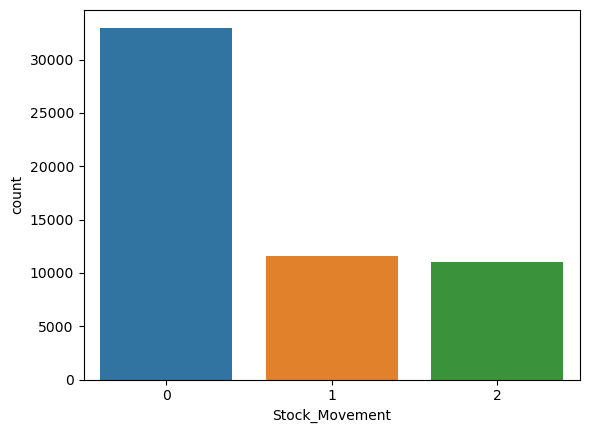

time: 140 ms (started: 2023-08-24 16:10:39 +01:00)


In [388]:
_ = sns.countplot(x='Stock_Movement', data=df)

In [244]:
!pip install -U imbalanced-learn

time: 8.61 s (started: 2023-08-23 19:35:40 +01:00)


In [245]:
!pip install imbalanced-learn

In [246]:
!pip install -U threadpoolctl

time: 9.27 s (started: 2023-08-23 19:35:57 +01:00)


In [247]:
from imblearn.over_sampling import SMOTE 


time: 0 ns (started: 2023-08-23 19:36:07 +01:00)


In [248]:
sm = SMOTE(random_state=78)


time: 16 ms (started: 2023-08-23 19:36:07 +01:00)


In [249]:
X_sm, y_sm = sm.fit_resample(X, y)


time: 328 ms (started: 2023-08-23 19:36:07 +01:00)


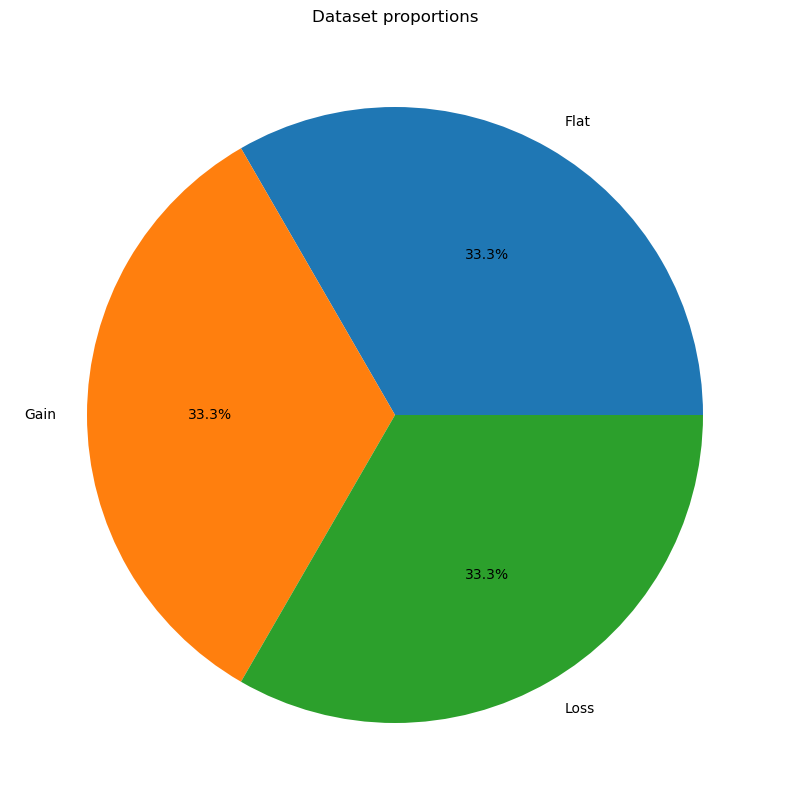

time: 313 ms (started: 2023-08-23 19:36:07 +01:00)


In [250]:
labels, counts = np.unique(y_sm, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

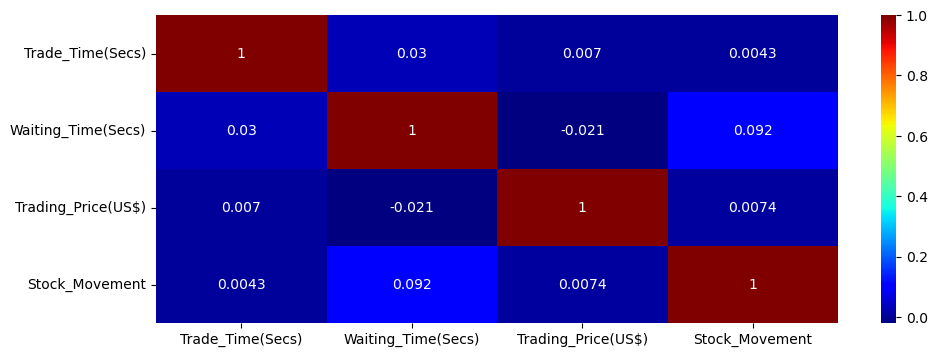

time: 453 ms (started: 2023-08-23 19:36:07 +01:00)


In [251]:
#Correlation plot
plt.figure(figsize=(11,4))
sns.heatmap(df.corr(), cmap="jet", annot=True)
plt.show()

## Pearson linear correlation

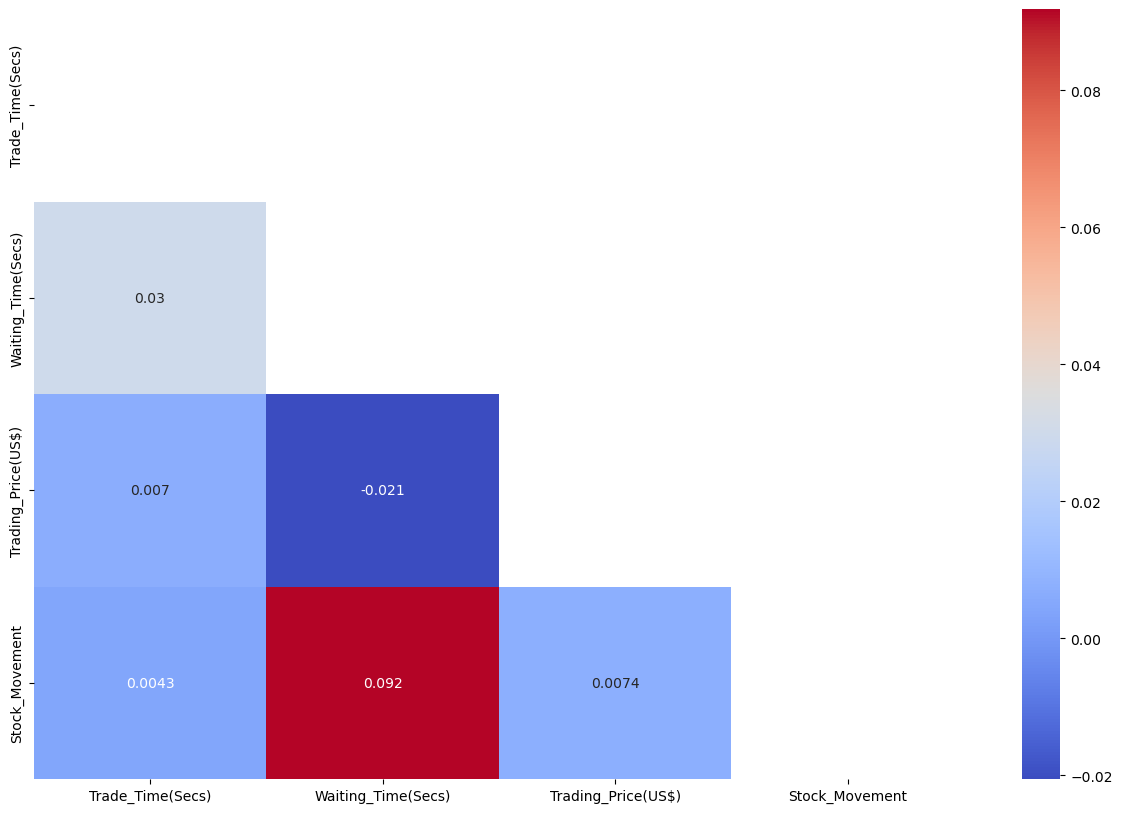

time: 328 ms (started: 2023-08-23 19:36:08 +01:00)


In [252]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', mask=np.triu(df.corr()), annot=True)
plt.show()

## Data split & normalization

In [253]:
# import package for splitting data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

time: 0 ns (started: 2023-08-23 19:36:08 +01:00)


In [254]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, shuffle=True, test_size=0.1)


time: 78 ms (started: 2023-08-23 19:36:08 +01:00)


In [255]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# check
X_train_ss

array([[-0.03609074, -0.29068523,  0.89321166],
       [ 0.19898456,  2.29783871, -0.08375228],
       [ 0.72568758,  1.57305201,  0.531671  ],
       ...,
       [ 0.26292505,  0.22701956,  0.59500738],
       [-0.65279402,  1.98721584, -1.0331961 ],
       [ 1.49377936, -0.60130811,  0.5079301 ]])

time: 16 ms (started: 2023-08-23 19:36:08 +01:00)


The preprocesing steps is complete for the dataset. Next we'll move to modelling

## Logistic Regression

In [256]:
# import logistic regression classifier
from sklearn.linear_model import LogisticRegression

# instantiate the LR classifier with default parameters
lr_model = LogisticRegression()


time: 0 ns (started: 2023-08-23 19:36:08 +01:00)


In [257]:
# define search space
space_lr = dict()
space_lr['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space_lr['penalty'] = ['l1', 'l2', 'elasticnet']
space_lr['C'] = [0.1, 0.5, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 1.0, 2.0 ]

time: 0 ns (started: 2023-08-23 19:36:08 +01:00)


In [258]:
# grid search the hyper parameter
lr_search = GridSearchCV(estimator=lr_model, param_grid=space_lr, cv=10, n_jobs=-1)

time: 0 ns (started: 2023-08-23 19:36:08 +01:00)


In [259]:
# fit the lr classifier on the train set
lr_result = lr_search.fit(X_train_ss, y_train)

time: 1min 33s (started: 2023-08-23 19:36:08 +01:00)


In [260]:
# print the best score from the search
print(f'The best score from the search is {lr_result.best_score_}', '\n')

# print the best parameters from the search
print(f'The best parameter from the search is {lr_result.best_params_}')

The best score from the search is 0.36087793776356536 

The best parameter from the search is {'C': 1e-05, 'penalty': 'l2', 'solver': 'saga'}
time: 0 ns (started: 2023-08-23 19:37:42 +01:00)


In [261]:
# instantiate the LR with the resultant hyperparameters 
lr = LogisticRegression(solver='saga', C=0.00001, penalty='l2')

time: 63 ms (started: 2023-08-23 19:37:42 +01:00)


## Training the model

In [262]:
# fit the model on the train data
lr.fit(X_train_ss, y_train)

LogisticRegression(C=1e-05, solver='saga')

time: 1.41 s (started: 2023-08-23 19:37:42 +01:00)


In [263]:
# predict on the test set
lr_pred = lr.predict(X_test_ss)
lr_pred

array(['Gain', 'Loss', 'Gain', ..., 'Flat', 'Flat', 'Flat'], dtype=object)

time: 0 ns (started: 2023-08-23 19:37:43 +01:00)


In [264]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

        Flat       0.37      0.67      0.48      3351
        Gain       0.37      0.20      0.25      3274
        Loss       0.36      0.24      0.28      3277

    accuracy                           0.37      9902
   macro avg       0.37      0.37      0.34      9902
weighted avg       0.37      0.37      0.34      9902

time: 359 ms (started: 2023-08-23 19:37:44 +01:00)


Weighted Avg F1-score = (0.48 * 3351 + 0.26 * 3274 + 0.28 * 3277) / 9902 ≈ 0.333

The combined F1-score from the table is approximately 0.33.

In [265]:
print(f'The Accuracy of Logistic Regression is: {np.round(accuracy_score(y_test, lr_pred), decimals=3)*100}%')

The Accuracy of Logistic Regression is: 36.9%
time: 16 ms (started: 2023-08-23 19:37:44 +01:00)


In [266]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Trains F1_Score Logistic Regression: ", metrics.f1_score(y_train, lr.predict(X_train), average='micro'))

Trains F1_Score Logistic Regression:  0.3335989047982405
time: 968 ms (started: 2023-08-23 19:37:44 +01:00)


In [267]:
from sklearn.metrics import precision_score, recall_score

# Calculate micro-averaged precision and recall
micro_precision = precision_score(y_test, lr_pred, average='micro')
micro_recall = recall_score(y_test, lr_pred, average='micro')

print(f"Micro-Averaged Precision: {micro_precision:.2f}")
print(f"Micro-Averaged Recall: {micro_recall:.2f}")

Micro-Averaged Precision: 0.37
Micro-Averaged Recall: 0.37
time: 282 ms (started: 2023-08-23 19:37:45 +01:00)


<Figure size 1200x1200 with 0 Axes>

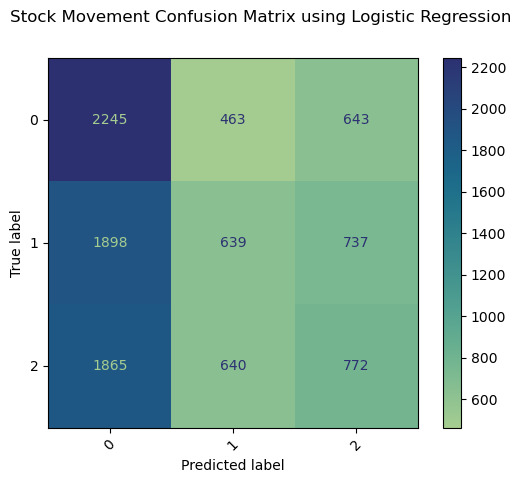

time: 407 ms (started: 2023-08-23 19:37:45 +01:00)


In [268]:
# Displaying Results in Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='crest')
plt.xticks(rotation=45)
plt.suptitle('Stock Movement Confusion Matrix using Logistic Regression')
plt.show()

## SVM

In [269]:
# import the SVM classifier
from sklearn.svm import SVC

time: 0 ns (started: 2023-08-23 19:37:46 +01:00)


In [270]:
# train the model on train set
svm_model = SVC()

time: 16 ms (started: 2023-08-23 19:37:46 +01:00)


In [271]:
svm_model.fit(X_train_ss, y_train)

SVC()

time: 13min 7s (started: 2023-08-23 19:37:46 +01:00)


In [272]:
# predict on the test set
svc_pred = svm_model.predict(X_test_ss)
svc_pred

array(['Gain', 'Loss', 'Loss', ..., 'Flat', 'Loss', 'Flat'], dtype=object)

time: 1min 48s (started: 2023-08-23 19:50:53 +01:00)


In [273]:
from sklearn.metrics import classification_report

time: 0 ns (started: 2023-08-23 19:52:41 +01:00)


In [274]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

        Flat       0.47      0.43      0.45      3351
        Gain       0.37      0.35      0.36      3274
        Loss       0.35      0.40      0.38      3277

    accuracy                           0.39      9902
   macro avg       0.40      0.39      0.40      9902
weighted avg       0.40      0.39      0.40      9902

time: 453 ms (started: 2023-08-23 19:52:41 +01:00)


Weighted Avg F1-score = (0.45 * 3351 + 0.36 * 3274 + 0.38 * 3277) / 9902 ≈ 0.394

The combined F1-score from the table, taking into account support, is approximately 0.394.

In [275]:
from sklearn.metrics import precision_score, recall_score

# Calculate micro-averaged precision and recall
micro_precision = precision_score(y_test, svc_pred, average='micro')
micro_recall = recall_score(y_test, svc_pred, average='micro')

print(f"Micro-Averaged Precision: {micro_precision:.2f}")
print(f"Micro-Averaged Recall: {micro_recall:.2f}")

Micro-Averaged Precision: 0.39
Micro-Averaged Recall: 0.39
time: 141 ms (started: 2023-08-23 19:52:41 +01:00)


<Figure size 1200x1200 with 0 Axes>

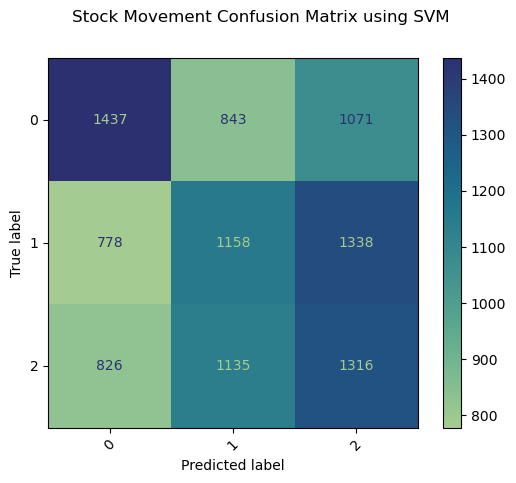

time: 281 ms (started: 2023-08-23 19:52:41 +01:00)


In [276]:
# Displaying Results in Confusion Matrix
cm = confusion_matrix(y_test, svc_pred)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='crest')
plt.xticks(rotation=45)
plt.suptitle('Stock Movement Confusion Matrix using SVM')
plt.show()

### Decision Tree

In [294]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

time: 0 ns (started: 2023-08-23 19:52:46 +01:00)


In [295]:
# instantiate the DT classifier with default parameters
dtc_model = DecisionTreeClassifier()


time: 47 ms (started: 2023-08-23 19:52:46 +01:00)


In [296]:
# define search space for hyperparameters
space_dtc = dict()
space_dtc['criterion'] = ['gini', 'entropy']
space_dtc['splitter'] = ['best', 'random']
space_dtc['min_samples_split'] = [2, 4, 6, 8, 10]
space_dtc['max_features'] = ['auto', 'sqrt', 'log2']



time: 16 ms (started: 2023-08-23 19:52:46 +01:00)


In [297]:
# Grid search the hyperparameters
dtc_search = GridSearchCV(estimator=dtc_model, param_grid=space_dtc, cv=10, n_jobs=1)



time: 15 ms (started: 2023-08-23 19:52:46 +01:00)


In [298]:
# fit the DT classifier on the train set
dtc_result = dtc_search.fit(X_train_ss, y_train)


time: 2min 8s (started: 2023-08-23 19:52:46 +01:00)


In [299]:
dtc_result

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

time: 15 ms (started: 2023-08-23 19:54:54 +01:00)


In [300]:
# print the best score from the search
print(f'The best score from the search is {dtc_result.best_score_}', '\n')

The best score from the search is 0.4837403912155855 

time: 47 ms (started: 2023-08-23 19:54:54 +01:00)


In [301]:

# print the best parameters from the search
print(f'The best parameter from the search is {dtc_result.best_params_}')

The best parameter from the search is {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'random'}
time: 0 ns (started: 2023-08-23 19:54:54 +01:00)


In [302]:

# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier


time: 0 ns (started: 2023-08-23 19:54:54 +01:00)


In [303]:
# instantiate the DT classifier with the resultant hyperparameters 
dtc = DecisionTreeClassifier(splitter='best', max_features='log2', criterion='entropy', min_samples_split=2)


time: 16 ms (started: 2023-08-23 19:54:54 +01:00)


In [304]:
# fit the model on the train data
dtc.fit(X_train_ss, y_train)


DecisionTreeClassifier(criterion='entropy', max_features='log2')

time: 703 ms (started: 2023-08-23 19:54:54 +01:00)


In [305]:
# predict on the test set
dtc_pred = dtc.predict(X_test_ss)
dtc_pred

array([1, 1, 2, ..., 0, 0, 0])

time: 0 ns (started: 2023-08-23 19:54:55 +01:00)


In [306]:
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_acc


0.49909109270854374

time: 0 ns (started: 2023-08-23 19:54:55 +01:00)


In [308]:
from sklearn.metrics import precision_score, recall_score

# Calculate micro-averaged precision and recall
micro_precision = precision_score(y_test, dtc_pred, average='micro')
micro_recall = recall_score(y_test, dtc_pred, average='micro')

print(f"Micro-Averaged Precision: {micro_precision:.2f}")
print(f"Micro-Averaged Recall: {micro_recall:.2f}")

Micro-Averaged Precision: 0.50
Micro-Averaged Recall: 0.50
time: 0 ns (started: 2023-08-23 19:54:55 +01:00)


In [309]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54      3351
           1       0.48      0.46      0.47      3274
           2       0.48      0.48      0.48      3277

    accuracy                           0.50      9902
   macro avg       0.50      0.50      0.50      9902
weighted avg       0.50      0.50      0.50      9902

time: 31 ms (started: 2023-08-23 19:54:55 +01:00)


Weighted Avg F1-score = (0.52 * 3351 + 0.47 * 3274 + 0.46 * 3277) / 9902 ≈ 0.487

The combined F1-score from the table, taking into account support, is approximately 0.487.

<Figure size 1200x1200 with 0 Axes>

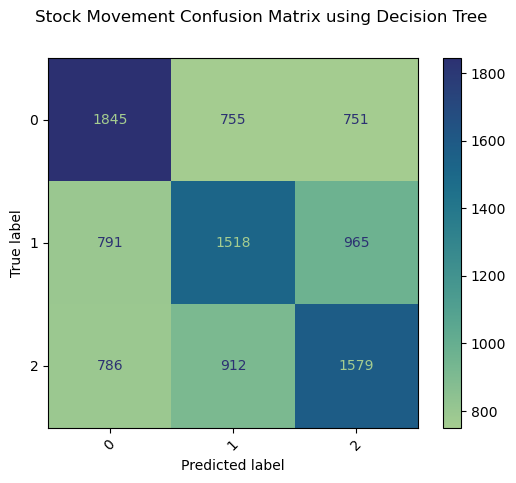

time: 328 ms (started: 2023-08-23 19:54:55 +01:00)


In [310]:
# Displaying Results in Confusion Matrix
cm = confusion_matrix(y_test, dtc_pred)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='crest')
plt.xticks(rotation=45)
plt.suptitle('Stock Movement Confusion Matrix using Decision Tree')
plt.show()

### Selection of best prediction model
From all the applied algorithms, the Decision Tree performed best by yielding an f1 score of approximately 49% on the test set of 5,556 samples. This f1 score on the test data outperformed that of SVC which had an f1 score of 39.40% and Logistics Regression’s 33.3%. Thus, the Decision Tree was selected for training the entire data.

In [380]:
# Make a prediction on the testing data using Decision Tree Classifier
dtc_pred = dtc.predict(X_test_ss)
dtc_pred

array([1, 1, 2, ..., 0, 0, 0])

time: 78 ms (started: 2023-08-24 15:37:09 +01:00)


In [381]:
# Get instance IDs for the test set
test_ids=range(len(y_test))

time: 0 ns (started: 2023-08-24 15:52:33 +01:00)


In [389]:
#Define a dictionary to map numeric value to nominal labels
label_dict={0:'Flat', 1: 'Gain', 2: 'Loss' } 


time: 0 ns (started: 2023-08-24 16:11:15 +01:00)


In [390]:
# Convert numeric prediction to nominal labels
y_pred_nominal=[label_dict[val] for val in dtc_pred]

time: 0 ns (started: 2023-08-24 16:11:16 +01:00)


In [395]:
# create a DataFrame with the IDs and predicted values as columns
pred_df = pd.DataFrame({'Stock Movement prediction': y_pred_nominal})
pred_df

,Stock Movement prediction
0,Gain
1,Gain
2,Loss
3,Loss
4,Gain
...,...
9897,Loss
9898,Gain
9899,Flat
9900,Flat


time: 46 ms (started: 2023-08-24 23:15:44 +01:00)


In [394]:
# save the DataFrame to a CSV file
pred_df.to_csv('GE Stock Price Forecasting.csv', index=False)

time: 32 ms (started: 2023-08-24 16:13:25 +01:00)


### Selection of best prediction model
From all the applied algorithms, the Decision Tree performed best by yielding an f1 score of approximately 49% on the test set of 5,556 samples. This f1 score on the test data outperformed that of SVC which had an f1 score of 39.40% and Logistics Regression’s 33.3%. Thus, the Decision Tree was selected for training the entire data.